In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df = pd.read_csv("heart.csv")

In [3]:
X = df[['restecg', 'chol']]  # independent variables
y = df['target']                # dependent variable

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf = RandomForestClassifier(random_state=0)
adb = AdaBoostClassifier(random_state=0)


In [6]:
# Random Forest
rf.fit(x_train, y_train)
rf_train_acc = rf.score(x_train, y_train)
rf_test_acc  = rf.score(x_test, y_test)

# AdaBoost
adb.fit(x_train, y_train)
adb_train_acc = adb.score(x_train, y_train)
adb_test_acc  = adb.score(x_test, y_test)


In [7]:
voting = VotingClassifier(
    estimators=[('rf', rf), ('adb', adb)],
    voting='soft'  # or 'hard'
)
voting.fit(x_train, y_train)
voting_train_acc = voting.score(x_train, y_train)
voting_test_acc  = voting.score(x_test, y_test)


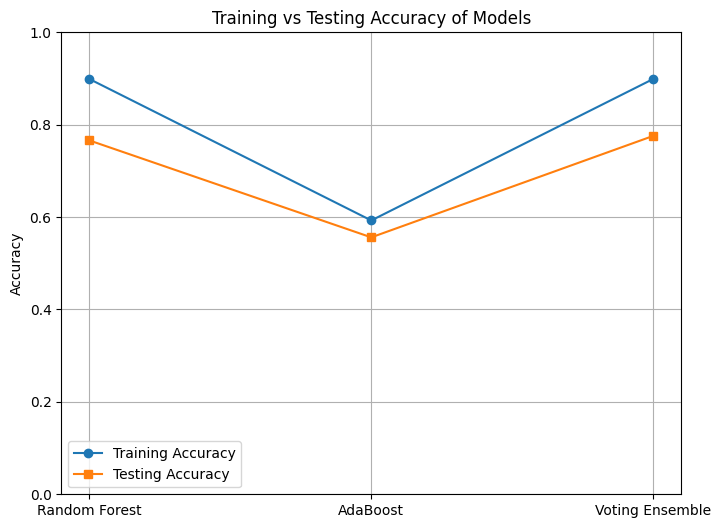

In [8]:
models = ['Random Forest', 'AdaBoost', 'Voting Ensemble']
train_acc = [rf_train_acc, adb_train_acc, voting_train_acc]
test_acc  = [rf_test_acc, adb_test_acc, voting_test_acc]

plt.figure(figsize=(8,6))
plt.plot(models, train_acc, marker='o', label='Training Accuracy')
plt.plot(models, test_acc, marker='s', label='Testing Accuracy')
plt.title("Training vs Testing Accuracy of Models")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(True)
plt.legend()
plt.show()
